In [36]:
import matplotlib as mpl

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn import tree
from random import uniform
from decision_tree import DecisionTree
from sklearn.metrics import mean_squared_error


In [37]:
def label(f1,f2):
    if f1 <= 50 and f2 <= 50: return 1
    if f1 <= 50 and f2 > 50 : return 0
    if f1 > 50 and f2 <= 50: return 0
    if f1 > 50 and f2 > 50: return 1


def get_dataset():
    points = [
        (uniform(0,100),uniform(0,100))
        for _ in range(220)
    ]
    labeled_points = [
        [f1,f2,label(f1, f2)]
        for f1,f2 in points
    ]
    return pd.DataFrame(
        data=labeled_points,
        columns=['f1','f2','target'],
        dtype=np.float64,
    )

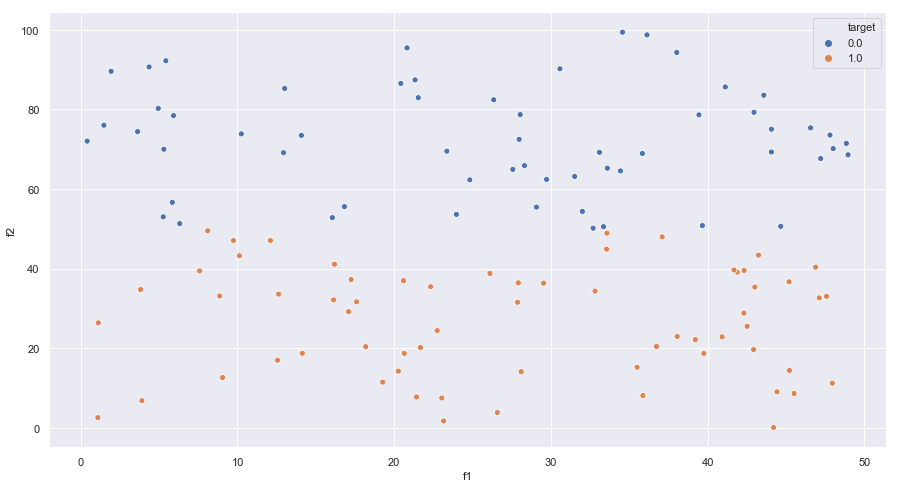

In [38]:
df = get_dataset()
df = df[df.f1 <= 50]
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(x="f1",y="f2", data=df, hue='target', ax=ax)

In [9]:
dt = DecisionTree()

In [10]:
dt.build_tree(df, 'target')


            Feature f2 splits on 50.648032916433806
        

            Feature f2 splits on 45.99841890909799
        


In [15]:
predictions = [
    dt.predict(df.iloc[i])
    for i in range(df.shape[0])
]
targets = list(df['target'].values)
df_res = pd.DataFrame(
    data=list(zip(predictions, targets)),
    columns=['prediction', 'target'],
    dtype=np.float64,
)
df_res.head(10)

,prediction,target
0,0.000000,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,1.000000,1.0
5,1.000000,1.0
6,1.000000,1.0
7,1.000000,1.0
8,0.666667,0.0
9,1.000000,1.0


In [17]:
mean_squared_error(df_res['target'].values, df_res['prediction'].values)

0.012461059190031154

## Let's compare our DecisionTree with the one in scikit-learn

In [24]:
clf = tree.DecisionTreeClassifier()
X = df.drop(['target'], axis=1).as_matrix()
y = df['target'].values
clf = clf.fit(X, y)
df_res = pd.DataFrame(
    data=list(zip(clf.predict(df.drop(['target'], axis=1).as_matrix()), df['target'].values)),
    columns=['prediction','target'],
    dtype=np.float64,
)

/Users/norbert/.local/share/virtualenvs/gbdt-nzyKpXJo/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/norbert/.local/share/virtualenvs/gbdt-nzyKpXJo/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [25]:
mean_squared_error(df_res['target'].values, df_res['prediction'].values)

0.0

## Let's analyse a more complex case

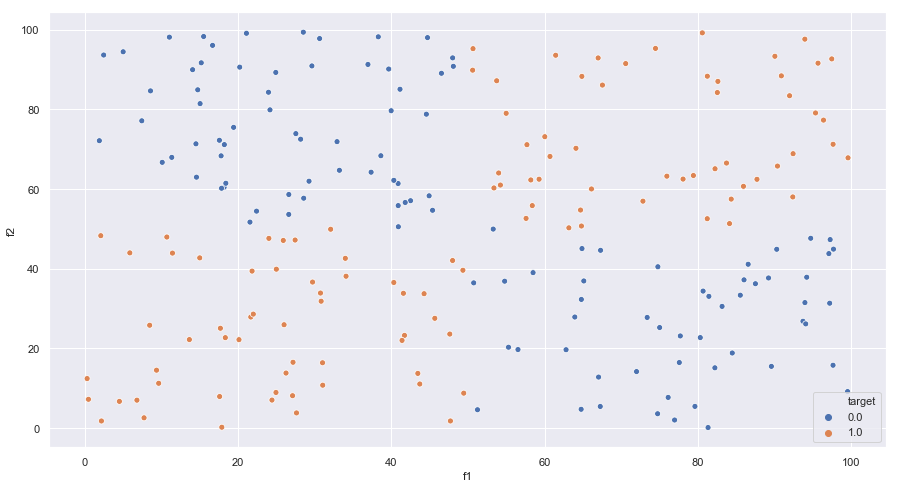

In [27]:
df = get_dataset()
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(x="f1",y="f2", data=df, hue='target', ax=ax)

In [28]:
dt = DecisionTree()

In [29]:
dt.build_tree(df, 'target')


            Feature f2 splits on 68.22930468174727
        

            Feature f1 splits on 62.37666315037775
        

            Feature f2 splits on 52.34950191786682
        

            Feature f1 splits on 50.35973318274661
        

            Feature f2 splits on 47.366538483712745
        

            Feature f1 splits on 45.34012603208488
        

            Feature f2 splits on 47.541548805689466
        

            Feature f1 splits on 79.76522330813216
        

            Feature f1 splits on 84.11608003847917
        

            Feature f1 splits on 50.61214393918044
        


In [30]:
predictions = [
    dt.predict(df.iloc[i])
    for i in range(df.shape[0])
]
targets = list(df['target'].values)
df_res = pd.DataFrame(
    data=list(zip(predictions, targets)),
    columns=['prediction', 'target'],
    dtype=np.float64,
)
df_res.head(10)

,prediction,target
0,1.000000,1.0
1,1.000000,1.0
2,0.666667,1.0
3,1.000000,1.0
4,0.000000,0.0
5,0.000000,0.0
6,0.888889,1.0
7,1.000000,1.0
8,1.000000,1.0
9,0.888889,1.0


In [31]:
mean_squared_error(df_res['target'].values, df_res['prediction'].values)

0.014078282828282829

In [32]:
clf = tree.DecisionTreeClassifier()
X = df.drop(['target'], axis=1).as_matrix()
y = df['target'].values
clf = clf.fit(X, y)
df_res = pd.DataFrame(
    data=list(zip(clf.predict(df.drop(['target'], axis=1).as_matrix()), df['target'].values)),
    columns=['prediction','target'],
    dtype=np.float64,
)
mean_squared_error(df_res['target'].values, df_res['prediction'].values)

/Users/norbert/.local/share/virtualenvs/gbdt-nzyKpXJo/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/norbert/.local/share/virtualenvs/gbdt-nzyKpXJo/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


0.0